In [1]:
ls

20151201.txt
20151208.txt
capture20110815-3.binetflow
classification_CV.ipynb
classification.ipynb
CSV_CICIDS/
CV_CICIDS.ipynb
CV_CTU.ipynb
CV.ipynb
CV_NSL.ipynb
Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
FridayCICIDS.csv*
Friday-WorkingHours-Morning.pcap_ISCX.csv*
KDD_Classification.ipynb
kddcup_corrected.csv
kddcup.data.corrected.csv
KDDTrain+.csv
NUSW-NB15_features.csv
RNN.ipynb
UNSW-NB15.csv
UNSW_NB15_testing-set.csv
UNSW_NB15_training-set.csv
UNSW_NB15_training-set_selected.csv
Untitled1.ipynb
Untitled.ipynb
Wednesday-workingHours.pcap_ISCX.csv*


In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
def train_split(data):
    X_train=data.drop(['attack_cat'], axis=1)
    y_train=data['attack_cat']
    return X_train,y_train

data_train = pd.read_csv('./UNSW_NB15_training-set_selected.csv').drop([ 'id', 'label'], axis=1)
#data_test = pd.read_csv('./UNSW_NB15_testing-set.csv').drop([ 'id', 'label'], axis=1)

X_train,Y_train = train_split(data_train)

#X_test,Y_test = train_split(data_test)

#print(Counter(Y))

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(Counter(Y_train))
#print(Counter(Y_test))

Counter({'Normal': 37000, 'Generic': 18871, 'Exploits': 11132, 'Fuzzers': 6062, 'DoS': 4089, 'Reconnaissance': 3496, 'Analysis': 677, 'Backdoor': 583, 'Shellcode': 378, 'Worms': 44})


In [4]:
def train_split_b(data):
    X_train=data.drop(['label'], axis=1)
    y_train=data['label']
    return X_train,y_train

data_train_b = pd.read_csv('./UNSW_NB15_training-set_selected.csv').drop([ 'id', 'attack_cat'], axis=1)
#data_test = pd.read_csv('./UNSW_NB15_testing-set.csv').drop([ 'id', 'label'], axis=1)

X_train_b,Y_train_b = train_split_b(data_train_b)
#X_test,Y_test = train_split(data_test)

#print(Counter(Y))

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(Counter(Y_train_b))
#print(Counter(Y_test))

Counter({1: 45332, 0: 37000})


In [5]:
from sklearn.preprocessing import OneHotEncoder

X1 = X_train.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe = pd.DataFrame(ohe.fit_transform(X1).toarray())

print(X1_ohe.shape)

X2 = X_train.select_dtypes(exclude=['object'])
sc = StandardScaler()
X2_sc = pd.DataFrame(sc.fit_transform(X2))
print(X2_sc.shape)

X_train_sc1 = pd.concat([X1_ohe,X2_sc], axis=1, sort=False)
print(X_train_sc1.shape)

(82332, 151)
(82332, 39)
(82332, 190)


In [6]:
from sklearn.preprocessing import OneHotEncoder

X1_b = X_train_b.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe_b = pd.DataFrame(ohe.fit_transform(X1_b).toarray())

print(X1_ohe_b.shape)

X2_b = X_train_b.select_dtypes(exclude=['object'])
sc_b = StandardScaler()
X2_sc_b = pd.DataFrame(sc_b.fit_transform(X2_b))
print(X2_sc_b.shape)

X_train_sc1_b = pd.concat([X1_ohe_b,X2_sc_b], axis=1, sort=False)
print(X_train_sc1_b.shape)

(82332, 151)
(82332, 39)
(82332, 190)


In [7]:
#instanciation
sc = StandardScaler()
#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.fit_transform(X_test)

encoder = LabelEncoder()
Y_train_1 = encoder.fit_transform(Y_train)
#Y_test_en = encoder.transform(Y_test)

X_train_sc, X_test_sc, Y_train_en, Y_test_en = train_test_split(X_train_sc1, Y_train_1, test_size=0.1)
print(Counter(Y_train_en))
print(Counter(Y_test_en))

Counter({6: 33266, 5: 16986, 3: 10048, 4: 5424, 2: 3703, 7: 3142, 0: 615, 1: 528, 8: 345, 9: 41})
Counter({6: 3734, 5: 1885, 3: 1084, 4: 638, 2: 386, 7: 354, 0: 62, 1: 55, 8: 33, 9: 3})


In [8]:
Y_train_1_b = Y_train_b
#Y_test_en = encoder.transform(Y_test)

X_train_sc_b, X_test_sc_b, Y_train_en_b, Y_test_en_b = train_test_split(X_train_sc1_b, Y_train_1_b, test_size=0.1)
print(Counter(Y_train_en_b))
print(Counter(Y_test_en_b))

Counter({1: 40835, 0: 33263})
Counter({1: 4497, 0: 3737})


In [6]:
model = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=10,input_dim=190, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [32]:
model_b = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=10,input_dim=190, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model_b.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train_sc, Y_train_en, epochs=150,batch_size=10)


Epoch 1/150
74098/74098 [==============================] - 12s 169us/sample - loss: 0.7352 - acc: 0.7497
Epoch 2/150
74098/74098 [==============================] - 12s 162us/sample - loss: 0.5776 - acc: 0.7934
Epoch 3/150
74098/74098 [==============================] - 10s 128us/sample - loss: 0.5558 - acc: 0.8020
Epoch 4/150
74098/74098 [==============================] - 8s 113us/sample - loss: 0.5450 - acc: 0.8067
Epoch 5/150
74098/74098 [==============================] - 9s 122us/sample - loss: 0.5384 - acc: 0.8089
Epoch 6/150
74098/74098 [==============================] - 11s 143us/sample - loss: 0.5332 - acc: 0.8123
Epoch 7/150
74098/74098 [==============================] - 13s 178us/sample - loss: 0.5298 - acc: 0.8132
Epoch 8/150
74098/74098 [==============================] - 15s 202us/sample - loss: 0.5268 - acc: 0.8151
Epoch 9/150
74098/74098 [==============================] - 13s 178us/sample - loss: 0.5241 - acc: 0.8161
Epoch 10/150
74098/74098 [==============================]

In [34]:
model_b.fit(X_train_sc_b, Y_train_en_b, epochs=150,batch_size=10)

Epoch 1/150
74098/74098 [==============================] - 16s 211us/sample - loss: 0.3691 - acc: 0.8529
Epoch 2/150
74098/74098 [==============================] - 14s 195us/sample - loss: 0.2295 - acc: 0.8986
Epoch 3/150
74098/74098 [==============================] - 16s 214us/sample - loss: 0.2191 - acc: 0.9051
Epoch 4/150
74098/74098 [==============================] - 15s 209us/sample - loss: 0.2146 - acc: 0.9071
Epoch 5/150
74098/74098 [==============================] - 15s 205us/sample - loss: 0.2121 - acc: 0.9096
Epoch 6/150
74098/74098 [==============================] - 14s 195us/sample - loss: 0.2101 - acc: 0.9107
Epoch 7/150
74098/74098 [==============================] - 14s 193us/sample - loss: 0.2089 - acc: 0.9118
Epoch 8/150
74098/74098 [==============================] - 13s 178us/sample - loss: 0.2076 - acc: 0.9130
Epoch 9/150
74098/74098 [==============================] - 14s 192us/sample - loss: 0.2069 - acc: 0.9136
Epoch 10/150
74098/74098 [=============================

In [9]:
#prédiction sur l'échantillon test
predSimple = model.predict_classes(X_test_sc)
predSimple

array([7, 6, 6, ..., 5, 3, 6])

In [35]:
#prédiction sur l'échantillon test
predSimple_b = model_b.predict_classes(X_test_sc_b)
predSimple_b

array([1, 1, 1, ..., 1, 0, 1])

In [10]:
Y_test_en

array([7, 6, 6, ..., 5, 3, 8])

In [36]:
Y_test_en_b

19469    1
55409    1
12680    1
32986    0
37773    0
12584    1
17617    1
37680    0
16387    1
76618    0
6225     1
60215    1
46130    1
66868    0
7411     1
41233    0
81504    0
1715     1
51445    1
4740     1
60668    1
55894    1
16179    1
42755    0
31121    0
74213    0
68400    0
16462    1
6913     1
78443    0
        ..
12688    1
70830    0
12456    1
32777    0
66664    0
31854    0
81656    0
3138     1
14229    1
79766    0
58704    1
35236    0
35913    0
72746    0
5022     1
61877    1
1365     1
62717    1
62762    1
23572    0
42555    0
58850    1
73497    0
57947    1
45289    1
13732    1
30644    0
17609    1
215      0
55538    1
Name: label, Length: 8234, dtype: int64

In [11]:
#taux de succès
print(metrics.accuracy_score(Y_test_en,predSimple))

0.8177070682535827


In [37]:
#taux de succès
print(metrics.accuracy_score(Y_test_en_b,predSimple_b))

0.9296818071411221


In [38]:
modelMul75_b = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=143, activation="softmax"),
    keras.layers.Dense(units=107, activation="softmax"),
    keras.layers.Dense(units=80, activation="softmax"),
    keras.layers.Dense(units=60, activation="softmax"),
    keras.layers.Dense(units=45, activation="softmax"),
    keras.layers.Dense(units=34, activation="softmax"),
    keras.layers.Dense(units=25, activation="softmax"),
    keras.layers.Dense(units=18, activation="softmax"),
    keras.layers.Dense(units=14, activation="softmax"),
    keras.layers.Dense(units=10, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
modelMul75 = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=143, activation="softmax"),
    keras.layers.Dense(units=107, activation="softmax"),
    keras.layers.Dense(units=80, activation="softmax"),
    keras.layers.Dense(units=60, activation="softmax"),
    keras.layers.Dense(units=45, activation="softmax"),
    keras.layers.Dense(units=34, activation="softmax"),
    keras.layers.Dense(units=25, activation="softmax"),
    keras.layers.Dense(units=18, activation="softmax"),
    keras.layers.Dense(units=14, activation="softmax"),
    keras.layers.Dense(units=10, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
modelMul75.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
modelMul75_b.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
modelMul75.fit(X_train_sc, Y_train_en, epochs=100,batch_size=10)

Epoch 1/100
74098/74098 [==============================] - 66s 887us/sample - loss: 1.5865 - acc: 0.4454
Epoch 2/100
74098/74098 [==============================] - 66s 886us/sample - loss: 1.5461 - acc: 0.4495
Epoch 3/100
74098/74098 [==============================] - 65s 873us/sample - loss: 1.5459 - acc: 0.4495
Epoch 4/100
74098/74098 [==============================] - ETA: 0s - loss: 1.5459 - acc: 0.449 - 63s 853us/sample - loss: 1.5460 - acc: 0.4495
Epoch 5/100
74098/74098 [==============================] - 64s 864us/sample - loss: 1.5460 - acc: 0.4495
Epoch 6/100
74098/74098 [==============================] - 64s 870us/sample - loss: 1.5460 - acc: 0.4495
Epoch 7/100
74098/74098 [==============================] - 64s 863us/sample - loss: 1.5460 - acc: 0.4495
Epoch 8/100
74098/74098 [==============================] - 64s 863us/sample - loss: 1.5460 - acc: 0.4495
Epoch 9/100
74098/74098 [==============================] - 63s 848us/sample - loss: 1.5460 - acc: 0.4495
Epoch 10/100
7409

74098/74098 [==============================] - 42s 569us/sample - loss: 1.5459 - acc: 0.4495
Epoch 79/100
74098/74098 [==============================] - 39s 524us/sample - loss: 1.5460 - acc: 0.4495
Epoch 80/100
74098/74098 [==============================] - 36s 486us/sample - loss: 1.5460 - acc: 0.4495
Epoch 81/100
74098/74098 [==============================] - 42s 563us/sample - loss: 1.5460 - acc: 0.4495
Epoch 82/100
74098/74098 [==============================] - 42s 562us/sample - loss: 1.5459 - acc: 0.4495
Epoch 83/100
74098/74098 [==============================] - 41s 552us/sample - loss: 1.5460 - acc: 0.4495
Epoch 84/100
74098/74098 [==============================] - 41s 552us/sample - loss: 1.5460 - acc: 0.4495
Epoch 85/100
74098/74098 [==============================] - 42s 564us/sample - loss: 1.5460 - acc: 0.4495
Epoch 86/100
74098/74098 [==============================] - 42s 569us/sample - loss: 1.5460 - acc: 0.4495
Epoch 87/100
74098/74098 [==============================] -

In [40]:
modelMul75_b.fit(X_train_sc_b, Y_train_en_b, epochs=100,batch_size=10)

Epoch 1/100
74098/74098 [==============================] - 33s 449us/sample - loss: 0.7897 - acc: 0.5441
Epoch 2/100
74098/74098 [==============================] - 36s 480us/sample - loss: 0.6885 - acc: 0.5513
Epoch 3/100
74098/74098 [==============================] - 35s 467us/sample - loss: 0.6881 - acc: 0.5513
Epoch 4/100
74098/74098 [==============================] - 49s 667us/sample - loss: 0.6881 - acc: 0.5513
Epoch 5/100
74098/74098 [==============================] - 46s 618us/sample - loss: 0.6881 - acc: 0.5513
Epoch 6/100
74098/74098 [==============================] - 59s 793us/sample - loss: 0.6880 - acc: 0.5513
Epoch 7/100
74098/74098 [==============================] - 56s 756us/sample - loss: 0.6881 - acc: 0.5513
Epoch 8/100
74098/74098 [==============================] - 57s 765us/sample - loss: 0.6881 - acc: 0.5513
Epoch 9/100
74098/74098 [==============================] - 55s 747us/sample - loss: 0.6880 - acc: 0.5513
Epoch 10/100
74098/74098 [=============================

In [16]:
#prédiction sur l'échantillon test
predMul75 = modelMul75.predict_classes(X_test_sc)
predMul75

array([6, 6, 6, ..., 6, 6, 6])

In [41]:
#prédiction sur l'échantillon test
predMul75_b = modelMul75_b.predict_classes(X_test_sc_b)
predMul75_b

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
#taux de succès
print(metrics.accuracy_score(Y_test_en,predMul75))

0.4486276414865193


In [42]:
#taux de succès
print(metrics.accuracy_score(Y_test_en_b,predMul75_b))

0.5446927374301676


In [18]:
modelMul50 = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=95, activation="softmax"),
    keras.layers.Dense(units=47, activation="softmax"),
    keras.layers.Dense(units=23, activation="softmax"),
    keras.layers.Dense(units=10, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
modelMul50_b = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=95, activation="softmax"),
    keras.layers.Dense(units=47, activation="softmax"),
    keras.layers.Dense(units=23, activation="softmax"),
    keras.layers.Dense(units=10, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
modelMul50.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
modelMul50_b.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
modelMul50.fit(X_train_sc, Y_train_en, epochs=100,batch_size=10)

Epoch 1/100
74098/74098 [==============================] - 36s 484us/sample - loss: 0.3388 - acc: 0.8724
Epoch 2/100
74098/74098 [==============================] - 33s 450us/sample - loss: 0.3378 - acc: 0.8720
Epoch 3/100
74098/74098 [==============================] - 24s 325us/sample - loss: 0.3380 - acc: 0.8723
Epoch 4/100
74098/74098 [==============================] - 24s 318us/sample - loss: 0.3370 - acc: 0.8728
Epoch 5/100
74098/74098 [==============================] - 24s 317us/sample - loss: 0.3368 - acc: 0.8728
Epoch 6/100
74098/74098 [==============================] - 24s 319us/sample - loss: 0.3366 - acc: 0.8725
Epoch 7/100
74098/74098 [==============================] - 25s 344us/sample - loss: 0.3360 - acc: 0.8731
Epoch 8/100
74098/74098 [==============================] - 24s 318us/sample - loss: 0.3351 - acc: 0.8729
Epoch 9/100
74098/74098 [==============================] - 23s 313us/sample - loss: 0.3348 - acc: 0.8744
Epoch 10/100
74098/74098 [=============================

In [48]:
modelMul50_b.fit(X_train_sc_b, Y_train_en_b, epochs=100,batch_size=10)

Epoch 1/100
74098/74098 [==============================] - 48s 649us/sample - loss: 0.7647 - acc: 0.5710
Epoch 2/100
74098/74098 [==============================] - ETA: 0s - loss: 0.4302 - acc: 0.787 - 48s 642us/sample - loss: 0.4302 - acc: 0.7872
Epoch 3/100
74098/74098 [==============================] - 48s 650us/sample - loss: 0.2521 - acc: 0.8882
Epoch 4/100
74098/74098 [==============================] - 49s 665us/sample - loss: 0.1455 - acc: 0.9440
Epoch 5/100
74098/74098 [==============================] - 32s 430us/sample - loss: 0.1287 - acc: 0.9503
Epoch 6/100
74098/74098 [==============================] - 32s 427us/sample - loss: 0.1230 - acc: 0.9523
Epoch 7/100
74098/74098 [==============================] - 39s 526us/sample - loss: 0.1203 - acc: 0.9526
Epoch 8/100
74098/74098 [==============================] - 48s 646us/sample - loss: 0.1174 - acc: 0.9542
Epoch 9/100
74098/74098 [==============================] - 45s 610us/sample - loss: 0.1139 - acc: 0.9549
Epoch 10/100
7409

74098/74098 [==============================] - 44s 590us/sample - loss: 0.0774 - acc: 0.9689
Epoch 79/100
74098/74098 [==============================] - 44s 595us/sample - loss: 0.0762 - acc: 0.9696
Epoch 80/100
74098/74098 [==============================] - 45s 609us/sample - loss: 0.0767 - acc: 0.9693
Epoch 81/100
74098/74098 [==============================] - 44s 597us/sample - loss: 0.0766 - acc: 0.9693
Epoch 82/100
74098/74098 [==============================] - 42s 561us/sample - loss: 0.0768 - acc: 0.9690
Epoch 83/100
74098/74098 [==============================] - 41s 553us/sample - loss: 0.0759 - acc: 0.9699
Epoch 84/100
74098/74098 [==============================] - 42s 567us/sample - loss: 0.0756 - acc: 0.9693
Epoch 85/100
74098/74098 [==============================] - 43s 586us/sample - loss: 0.0760 - acc: 0.9695
Epoch 86/100
74098/74098 [==============================] - 40s 546us/sample - loss: 0.0756 - acc: 0.9696
Epoch 87/100
74098/74098 [==============================] -

In [21]:
#prédiction sur l'échantillon test
predMul50 = modelMul50.predict_classes(X_test_sc)
predMul50

array([7, 6, 6, ..., 5, 7, 4])

In [49]:
#prédiction sur l'échantillon test
predMul50_b = modelMul50_b.predict_classes(X_test_sc_b)
predMul50_b

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
#taux de succès
print(metrics.accuracy_score(Y_test_en,predMul50))

0.8580276900655818


In [50]:
#taux de succès
print(metrics.accuracy_score(Y_test_en_b,predMul50_b))

0.9696380859849405


In [23]:
modelMul = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=145, activation="softmax"),
    keras.layers.Dense(units=95, activation="softmax"),
    keras.layers.Dense(units=47, activation="softmax"),
    keras.layers.Dense(units=10, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [69]:
modelMul_b = keras.Sequential([
   # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=190,input_dim=190, activation="softmax"),
    keras.layers.Dense(units=145, activation="softmax"),
    keras.layers.Dense(units=95, activation="softmax"),
    keras.layers.Dense(units=47, activation="softmax"),
    keras.layers.Dense(units=1, activation="softmax"),
    #keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
modelMul.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics={'output_a': 'accuracy'})

In [70]:
modelMul_b.compile(optimizer='adam', 
              loss='binary_crossentropy',
             metrics={'output_a': 'accuracy'})

In [25]:
modelMul.fit(X_train_sc, Y_train_en, epochs=150,batch_size=10)

Epoch 1/150
74098/74098 [==============================] - 28s 374us/sample - loss: 1.1591
Epoch 2/150
74098/74098 [==============================] - 28s 374us/sample - loss: 0.6366
Epoch 3/150
74098/74098 [==============================] - 30s 412us/sample - loss: 0.5875
Epoch 4/150
74098/74098 [==============================] - 36s 484us/sample - loss: 0.5580
Epoch 5/150
74098/74098 [==============================] - 35s 467us/sample - loss: 0.5418
Epoch 6/150
74098/74098 [==============================] - 34s 464us/sample - loss: 0.5289
Epoch 7/150
74098/74098 [==============================] - 34s 462us/sample - loss: 0.5140
Epoch 8/150
74098/74098 [==============================] - 33s 447us/sample - loss: 0.4971
Epoch 9/150
74098/74098 [==============================] - 32s 438us/sample - loss: 0.4840
Epoch 10/150
74098/74098 [==============================] - 28s 372us/sample - loss: 0.4730
Epoch 11/150
74098/74098 [==============================] - 32s 429us/sample - loss: 0.46

In [71]:
modelMul_b.fit(X_train_sc_b, Y_train_en_b, epochs=150,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
74098/74098 [==============================] - 56s 755us/sample - loss: 7.1540
Epoch 2/150
74098/74098 [==============================] - 59s 797us/sample - loss: 7.1540
Epoch 3/150
74098/74098 [==============================] - 59s 797us/sample - loss: 7.1540
Epoch 4/150
74098/74098 [==============================] - 59s 795us/sample - loss: 7.1540
Epoch 5/150
74098/74098 [==============================] - 56s 757us/sample - loss: 7.1540
Epoch 6/150
74098/74098 [==============================] - 43s 584us/sample - loss: 7.1540
Epoch 7/150
74098/74098 [==============================] - 51s 687us/sample - loss: 7.1540
Epoch 8/150
74098/74098 [==============================] - 54s 725us/sample - loss: 7.1540
Epoch 9/150
74098/74098 [==============================] - 50s 676us/sample - loss: 7.1540
Epoch 10/150
74098/74098 [==============================] - 52s 701us/sample - loss: 7.1540
Epoch 11/150
74098/74098 [===============

In [72]:
#prédiction sur l'échantillon test
predMul = modelMul.predict_classes(X_test_sc)
predMul

array([7, 6, 6, ..., 5, 3, 5])

In [73]:
#prédiction sur l'échantillon test
predMul_b = modelMul_b.predict_classes(X_test_sc_b)
predMul_b

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [27]:
#taux de succès
print(metrics.accuracy_score(Y_test_en,predMul))

0.8656788923973767


In [74]:
#taux de succès
print(metrics.accuracy_score(Y_test_en_b,predMul_b))

0.5446927374301676


In [60]:
from sklearn.metrics import roc_curve

# Compute ROC curve and ROC area for each class
n_classes=10
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_en, predMul,pos_label=i)
    print(fpr[i], i)

[0.         0.00220967 0.03670513 0.50282347 0.72943776 0.78296096
 0.94230297 0.99987724 1.        ] 0
[0.         0.00207824 0.03643032 0.50036675 0.72579462 0.77897311
 0.94046455 0.9997555  1.        ] 1
[0.         0.00217725 0.03765369 0.52215676 0.75768443 0.81262807
 0.96516393 0.99974385 1.        ] 2
[0.         0.00211119 0.04025334 0.56988037 0.82843068 0.88684025
 0.95862069 0.99985925 1.        ] 3
[0.         0.00209479 0.03836083 0.5236973  0.76525268 0.77441739
 0.93964389 0.99973815 1.        ] 4
[0.         0.0028222  0.0468799  0.64142364 0.64581373 0.71354657
 0.92521167 0.99968642 1.        ] 5
[0.         0.00330396 0.06255507 0.10242291 0.50770925 0.59669604
 0.89251101 0.99955947 1.        ] 6
[0.         0.00228629 0.00685888 0.48532961 0.71980185 0.77467293
 0.94068335 0.99974597 1.        ] 7
[0.         0.00121832 0.03472222 0.49658869 0.72124756 0.77424464
 0.94054581 0.99975634 1.        ] 8
[0.         0.00218712 0.0363305  0.49769137 0.7218712  0.774848

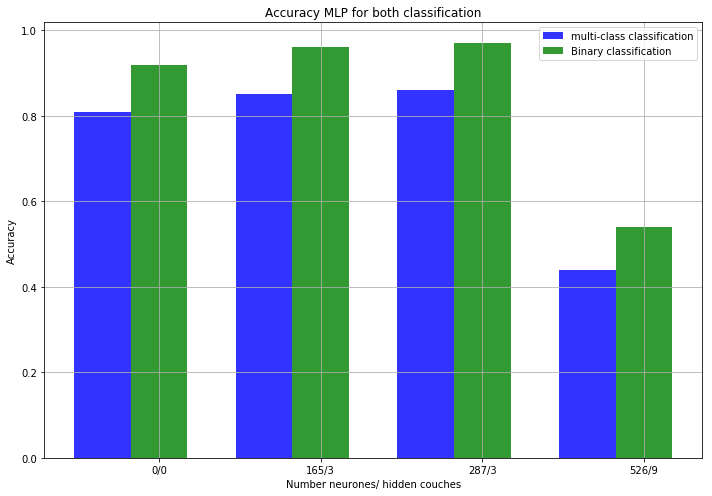

In [62]:

# data to plot
n_groups = 4
accuracy_MC = (0.81, 0.85, 0.86, 0.44)
accuracy_BC = (0.920, 0.96, 0.97,0.54)
# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy_MC, bar_width,
alpha=opacity,
color='b',
label='multi-class classification')

rects2 = plt.bar(index + bar_width, accuracy_BC, bar_width,
alpha=opacity,
color='g',
label='Binary classification')

plt.xlabel('Number neurones/ hidden couches')
plt.ylabel('Accuracy')
plt.title('Accuracy MLP for both classification')
plt.xticks(index + bar_width, ('0/0', '165/3', '287/3', '526/9'))
plt.legend()

plt.tight_layout()
plt.grid()

In [63]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, predSimple_b).ravel()
fpr=fp/(fp+tn)
print("fpr O/O: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, predMul_b).ravel()
fpr=fp/(fp+tn)
print("fpr 165/3: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, predMul50_b).ravel()
fpr=fp/(fp+tn)
print("fpr 287/3: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, predMul75_b).ravel()
fpr=fp/(fp+tn)
print("fpr 526/9: ",fpr)

fpr O/O:  0.06588423579621232
fpr 165/3:  0.018138170178714323
fpr 287/3:  0.022672712723392906
fpr 526/9:  1.0


No handles with labels found to put in legend.


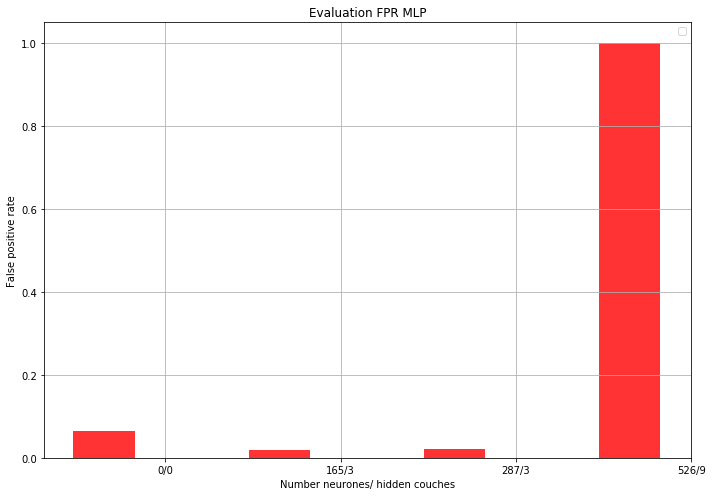

In [64]:
# data to plot
n_groups = 4
fpr = (0.065, 0.018, 0.022,1.0)
# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, fpr, bar_width,
alpha=opacity,
color='r')


plt.xlabel('Number neurones/ hidden couches')
plt.ylabel('False positive rate')
plt.title('Evaluation FPR MLP')
plt.xticks(index + bar_width, ('0/0', '165/3', '287/3', '526/9'))
plt.legend()

plt.tight_layout()
plt.grid()

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=190,
              input_length = training_length,
              output_dim=10,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


NameError: name 'training_length' is not defined

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9],'learning_rate' : ['constant', 'invscaling', 'adaptive'],'learning_rate_init':10.0 ** -np.arange(1, 10),'early_stopping':[True]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train_sc, Y_train_en)
print(clf.score(X_train_sc, Y_train_en))
print(clf.best_params_)

pred = clf.predict(X_test_sc)
              
#taux de succès
print(metrics.accuracy_score(Y_test_en,pred))


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

parameters = {'solver': [ 'adam'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9],'learning_rate_init':10.0 ** -np.arange(1, 10),'early_stopping':[True]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train_sc, Y_train_en)
print(clf.score(X_train_sc, Y_train_en))
print(clf.best_params_)

pred = clf.predict(X_test_sc)
              
#taux de succès
print(metrics.accuracy_score(Y_test_en,pred))


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
